# A Python Quick Start Tutorial
# Lesson \#1: Basic data types and functions
## by Peter Mackenzie-Helnwein
University of Washington, Seattle, WA

pmackenz@uw.edu          
https://www.ce.washington.edu/facultyfinder/peter-mackenzie-helnwein

## Resources

   1. Python Docs: https://docs.python.org/3/
   
   1. Python Tutorial (comprehensive): https://docs.python.org/3/tutorial/index.html
   
   1. Python Library Reference (the nitty-gritty details): https://docs.python.org/3/library/index.html
   
   1. Everything else: http://google.com
   

## Discussing questions from the self-study assignment

This section is to discuss your questions


### Exercise 1

**Theory**:
Stress transformation

$$
\begin{aligned}
\sigma_{x}' &= \sigma_{x} \cos^2\theta + \sigma_{y} \sin^2\theta + 2\tau_{xy} \sin\theta \cos\theta \\
\sigma_{y}' &= \sigma_{x} \sin^2\theta + \sigma_{y} \cos^2\theta - 2\tau_{xy} \sin\theta \cos\theta \\
\tau_{xy}'  &= (\sigma_{y} - \sigma_{x}) \sin\theta \cos\theta + \tau_{xy} (\cos^2\theta - \sin^2\theta) \\
\end{aligned}
$$

**Given**:
Stress state:

$$
\sigma_{x} = 12~ksi~,
~~~
\sigma_{y} = -5.5~ksi~,
~~~
\tau_{xy} = 3.5~ksi 
$$

**Find**:
Components of stress in a rotated coordinate system for $\theta=25^\circ$.

In [1]:
# theta needs to be in radians
# sin and cos are not part of phython

from math import sin, cos, pi, radians

In [3]:
radians(180)-pi

0.0

In [4]:
sigmax = 12.
sigmay = -5.5
tau    = 3.5

In [50]:
theta = radians(25.)

cs = cos (theta)
sn = sin (theta)

sigmaxp = sigmax * cs**2 + sigmay * sn**2 + 2 * tau * sn * cs
sigmayp = sigmax * sn**2 + sigmay * cs**2 - 2 * tau * sn * cs
taup    = (sigmay - sigmax) * sn * cs + tau * (cs**2 - sn**2)

In [51]:
print(f"sigx'={sigmaxp}, sigy'={sigmayp}, tau'={taup}")

sigx'=11.555547135673642, sigy'=-5.055547135673642, tau'=-4.453132243388171


In [52]:
"sigx'={}, sigy'={}, tau'={}".format(sigmaxp,sigmayp,taup)

"sigx'=11.555547135673642, sigy'=-5.055547135673642, tau'=-4.453132243388171"

In [53]:
"sigx'={:.2f}, sigy'={:12.2e}, tau'={:.2f}".format(sigmaxp,sigmayp,taup)

"sigx'=11.56, sigy'=   -5.06e+00, tau'=-4.45"

In [54]:
print("sigx'={:.2f}, sigy'={:12.2e}, tau'={:.2f}".format(sigmaxp,sigmayp,taup))

sigx'=11.56, sigy'=   -5.06e+00, tau'=-4.45


In [55]:
print(f"sigx'={sigmaxp:.2f}, sigy'={sigmayp:12.2e}, tau'={taup:.2f}")

sigx'=11.56, sigy'=   -5.06e+00, tau'=-4.45


### Exercise 2

Convert the calculation from exercise 1 to a function

In [77]:
def stressTransform(sigx, sigy, tauxy, theta):
    # YOUR CODE
    cs = cos (radians (theta))
    sn = sin (radians (theta))
    
    sx  = sigx * cs**2 + sigy * sn**2 + 2 * tauxy * sn * cs
    sy  = sigx * sn**2 + sigy * cs**2 - 2 * tauxy * sn * cs
    txy = (sigy - sigx) * sn * cs + tauxy * (cs**2 - sn**2)
    
    return (sx,sy,txy)

Test your function for 

* $\theta=0$ (what should the result look like?)
* $\theta=25^\circ$
* $\theta=180^\circ$

In [78]:
stressTransform(12., -5.5, 3.5, 0.0)

(12.0, -5.5, 3.5)

In [79]:
s1,s2,s3 = stressTransform(12., -5.5, 3.5, 0.0)

print (f"sigx'={s1:.6f}, sigy'={s2:.6f}, tau'={s3:.6f}")


sigx'=12.000000, sigy'=-5.500000, tau'=3.500000


In [80]:
stress = stressTransform(12., -5.5, 3.5, 0.0)
print (f"sigx'={stress[0]:.6f}, sigy'={stress[1]:.6f}, tau'={stress[2]:.6f}")


sigx'=12.000000, sigy'=-5.500000, tau'=3.500000


In [81]:
stress = stressTransform(12., -5.5, 3.5, 0.0)
print ("sigx'={:.6f}, sigy'={:.6f}, tau'={:.6f}".format(stress[0], stress[1], stress[2]))

sigx'=12.000000, sigy'=-5.500000, tau'=3.500000


In [82]:
stress = stressTransform(12., -5.5, 3.5, 0.0)
print ("sigx'={:.6f}, sigy'={:.6f}, tau'={:.6f}".format(*stress))

sigx'=12.000000, sigy'=-5.500000, tau'=3.500000


In [83]:
template = "theta={:6.2}: sigx'={:.6f}, sigy'={:.6f}, tau'={:.6f}"

theta = 0.0
stress = stressTransform(12., -5.5, 3.5, theta)
print (template.format(theta, *stress))

theta=   0.0: sigx'=12.000000, sigy'=-5.500000, tau'=3.500000


In [85]:
template = "theta={:7.2f}: sigx'={:12.6f}, sigy'={:12.6f}, tau'={:12.6f}"

thetas = [0., 25., 90., 135., 180.]

for theta in thetas:
    stress = stressTransform(12., -5.5, 3.5, theta)
    print (template.format(theta, *stress))

theta=   0.00: sigx'=   12.000000, sigy'=   -5.500000, tau'=    3.500000
theta=  25.00: sigx'=   11.555547, sigy'=   -5.055547, tau'=   -4.453132
theta=  90.00: sigx'=   -5.500000, sigy'=   12.000000, tau'=   -3.500000
theta= 135.00: sigx'=   -0.250000, sigy'=    6.750000, tau'=    8.750000
theta= 180.00: sigx'=   12.000000, sigy'=   -5.500000, tau'=    3.500000


### Exercise 3

Let's use this function to study stress transformation.  In order to do so,

1. Create a list of 81 evenly spaced $\theta$-values from $0^\circ$ to $180^\circ$.
2. Compute the transformed stress for each of these values and collect the results in three lists: 

       sigmax_values = ...
       sigmay_values = ...
       tauxy_values = ...

3. print a nice table with 4 columns: $\theta$, $\sigma_x'$, $\sigma_y'$, $\tau_{xy}'$

In [96]:
sigmax_values = []
sigmay_values = []
tauxy_values = []

# YOUR CODE HERE
Nsteps = 80
dtheta = 180/Nsteps

thetas = [ 0.0 ]

for i in range(Nsteps):
    thetas.append(thetas[-1] + dtheta)
#print (thetas, len(thetas))
    
for theta in thetas:
    stress = stressTransform(12., -5.5, 3.5, theta)
    sigmax_values.append(stress[0])
    sigmay_values.append(stress[1])
    tauxy_values.append(stress[2])
    
#print(sigmax_values)

#for i in range(len(thetas)):
#    print(template.format(thetas[i], sigmax_values[i], sigmay_values[i], tauxy_values[i]))
    
template = "{:12.4f} {:12.4f} {:12.4f} {:12.4f}"
    
for data in zip(thetas, sigmax_values, sigmay_values, tauxy_values):
    print(template.format(*data))

      0.0000      12.0000      -5.5000       3.5000
      2.2500      12.2476      -5.7476       2.8027
      4.5000      12.4398      -5.9398       2.0881
      6.7500      12.5753      -6.0753       1.3606
      9.0000      12.6533      -6.1533       0.6248
     11.2500      12.6733      -6.1733      -0.1149
     13.5000      12.6353      -6.1353      -0.8539
     15.7500      12.5393      -6.0393      -1.5876
     18.0000      12.3861      -5.8861      -2.3116
     20.2500      12.1766      -5.6766      -3.0212
     22.5000      11.9121      -5.4121      -3.7123
     24.7500      11.5941      -5.0941      -4.3805
     27.0000      11.2247      -4.7247      -5.0217
     29.2500      10.8061      -4.3061      -5.6319
     31.5000      10.3409      -3.8409      -6.2073
     33.7500       9.8321      -3.3321      -6.7446
     36.0000       9.2826      -2.7826      -7.2402
     38.2500       8.6959      -2.1959      -7.6912
     40.5000       8.0757      -1.5757      -8.0948
     42.7500

### Exercise 4: Explore plotting in python

For this, check out https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/simple_plot.html#sphx-glr-gallery-lines-bars-and-markers-simple-plot-py

I copied the demo code below so you can modify it to plot $(\sigma_{x}'/\tau_{xy}')$ and  $(\sigma_{y}'/-\tau_{xy}')$ curves from the data collected in `sigmax_values`, `sigmay_values`, `tauxy_values`

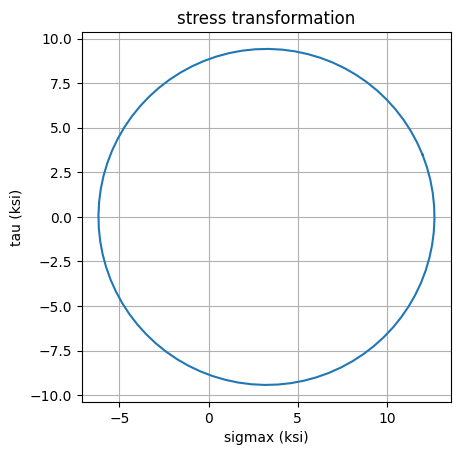

In [102]:
#import matplotlib
import matplotlib.pyplot as plt
#import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(sigmax_values, tauxy_values)

ax.set(xlabel='sigmax (ksi)', ylabel='tau (ksi)',
       title='stress transformation')
ax.grid()
ax.set_aspect('equal')

# I comment writing the figure to file ... makes this quicker
# fig.savefig("test.png")
plt.show()

**Remark**: This was just to wet your appetite! We will talk much more about `numpy` and `matplotlib` next week.

## Exercise 5: List versus dictionary

You could express the stress state as

1. three independent variables - the way we did it thus far

2. a list of three values: `stress = `$[\sigma_x, \sigma_y, \tau_{xy}]$ and replace

        sigma_x --> stress[0]
        sigma_y --> stress[2]
        tau_xy  --> stress[3]
        
3. a dictionary 

        stress = {'sigx': 12.0, 'sigy': -5.5, 'tau':3.50}
        
   and replace

        sigma_x --> stress['sigx']
        sigma_y --> stress['sigy']
        tau_xy  --> stress['tau']

**Discuss**:

1. Pros and cons for coding the equations
2. Pros and cons for coding the function(s)
3. How woud code and function change when switching from 2D to 3D (6 components instead of 3 components)

Feel free to implement an alternative form of stressTrannsform() that looks like this:

In [ ]:
def stressTransform(stress, theta):
    # YOUR CODE
    # stress2 is a list or dictionary, just as stress is
    
    return stress2

## Homework questions

We can all learn from your questions!